In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split("/")[-1],TRAIN_URL)

TEST_URL="http://download.tensorflow.org/data/iris_test.csv"
test_path = tf.keras.utils.get_file(TEST_URL.split("/")[-1],TEST_URL)

In [3]:
df_iris_train=pd.read_csv(train_path,header=0)
df_iris_test=pd.read_csv(test_path,header=0)

iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

train_x=iris_train[:,0:2]
train_y=iris_train[:,4]

test_x=iris_test[:,0:2]
test_y=iris_test[:,4]

x_train=train_x[train_y<2]
y_train=train_y[train_y<2]

x_test=test_x[test_y<2]
y_test=test_y[test_y<2]

num_train=len(x_train)
num_test=len(x_test)

x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)

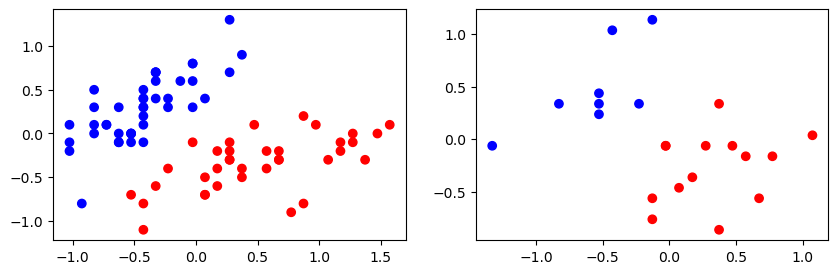

In [4]:
plt.figure(figsize=(10,3))
cm_pt=mpl.colors.ListedColormap(["blue","red"])

plt.subplot(1,2,1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)

plt.show()

In [5]:
x0_train=np.ones(num_train).reshape(-1,1)
X_train=tf.cast(tf.concat((x0_train,x_train),axis=1),tf.float32)
Y_train=tf.cast(y_train.reshape(-1,1),tf.float32)

x0_test=np.ones(num_test).reshape(-1,1)
X_test=tf.cast(tf.concat((x0_test,x_test),axis=1),tf.float32)
Y_test=tf.cast(y_test.reshape(-1,1),tf.float32)

In [6]:
learn_rate=0.2
iter=500
display_step=50

np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [7]:
ce_train=[]
ce_test=[]
acc_train=[]
acc_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train=1/(1+tf.exp(-tf.matmul(X_train,W)))
        Loss_train=-tf.reduce_mean(Y_train*tf.math.log(PRED_train)+(1-Y_train)*tf.math.log(1-PRED_train))
        PRED_test=1/(1+tf.exp(-tf.matmul(X_test,W)))
        Loss_test=-tf.reduce_mean(Y_test*tf.math.log(PRED_test)+(1-Y_test)*tf.math.log(1-PRED_test))
        
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_train.numpy()<0.5,0.,1.),Y_train),tf.float32))
    accuracy_test=t=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_test.numpy()<0.5,0.,1.),Y_test),tf.float32))
    
    ce_train.append(Loss_train)
    ce_test.append(Loss_test)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    dL_dW=tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i%display_step==0:
        print("i: %i, TrainAcc: %f, TrainLoss: %f, TestAcc: %f, TestLoss: %f"%(i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i: 0, TrainAcc: 0.230769, TrainLoss: 0.994269, TestAcc: 0.272727, TestLoss: 0.939684
i: 50, TrainAcc: 0.974359, TrainLoss: 0.357479, TestAcc: 0.863636, TestLoss: 0.396452
i: 100, TrainAcc: 0.987179, TrainLoss: 0.230502, TestAcc: 0.863636, TestLoss: 0.280471
i: 150, TrainAcc: 1.000000, TrainLoss: 0.177490, TestAcc: 0.863636, TestLoss: 0.229677
i: 200, TrainAcc: 1.000000, TrainLoss: 0.147382, TestAcc: 0.863636, TestLoss: 0.200189
i: 250, TrainAcc: 1.000000, TrainLoss: 0.127621, TestAcc: 0.954545, TestLoss: 0.180637
i: 300, TrainAcc: 1.000000, TrainLoss: 0.113510, TestAcc: 0.954545, TestLoss: 0.166592
i: 350, TrainAcc: 1.000000, TrainLoss: 0.102854, TestAcc: 1.000000, TestLoss: 0.155936
i: 400, TrainAcc: 1.000000, TrainLoss: 0.094481, TestAcc: 1.000000, TestLoss: 0.147520
i: 450, TrainAcc: 1.000000, TrainLoss: 0.087701, TestAcc: 1.000000, TestLoss: 0.140667
i: 500, TrainAcc: 1.000000, TrainLoss: 0.082081, TestAcc: 1.000000, TestLoss: 0.134950


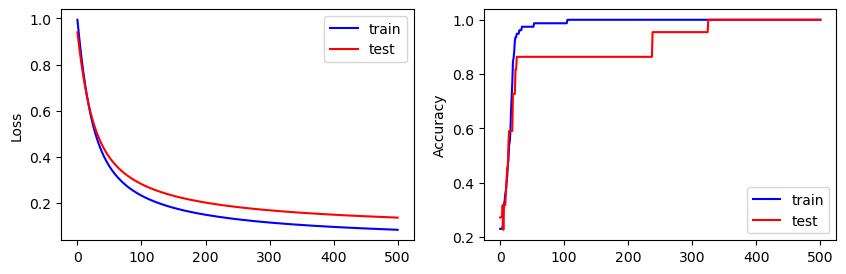

In [8]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(ce_train,color="blue",label="train")
plt.plot(ce_test,color="red",label="test")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc_train,color="blue",label="train")
plt.plot(acc_test,color="red",label="test")
plt.ylabel("Accuracy")
plt.legend()

plt.show()